### **PREPROCESSING STEPS**


**Drive Connection**



In [3]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
# to show current working directory
!pwd 
!ls
%cd drive/MyDrive/Project
!ls

/content
drive  sample_data
/content/drive/MyDrive/Project
 Model.ipynb		 spectrograms   X_train.npy   y_test.npy    y_val.npy
'Preprocessing.ipynb '	 X_test.npy     X_val.npy     y_train.npy


**Importing Required Libraries**



In [5]:
# importing libraries 
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

**Path of Spectrograms**



In [5]:
# to set path containing pics
path = '/content/drive/MyDrive/Project/spectrograms'

**GrayScale - Resize - Normalization**

In [6]:
%%time

X_data = []
y_data = []

for subdir, dirs, files in os.walk(path):
    for file in files:
        pic = cv2.imread(os.path.join(subdir, file))
        pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
        pic = cv2.resize(pic, (32, 32))
        
        X_data.append(pic)
        y_data.append(int(subdir[-1]))
        # print(os.path.join(subdir, file))
        # print(int(subdir[-1]))

X = np.array(X_data) / 255
y = np.array(y_data).reshape(-1, 1)

#converting the list to numpy array and saving it to a file using #numpy.save
#np.save(os.path.join(path,'X_array'), X)
#np.save(os.path.join(path,'y_array'), y)

print(X.shape)
print(y.shape)

(8732, 32, 32)
(8732, 1)
CPU times: user 39.8 s, sys: 5.52 s, total: 45.3 s
Wall time: 3min 32s


**Variables Control**



In [7]:
print(X[0:2])
print(y[0:2])

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.55686275 0.43921569 0.31372549 ... 0.41568627 0.43921569 0.56078431]
  [0.67058824 0.62745098 0.61960784 ... 0.33333333 0.25098039 0.54117647]
  [0.31372549 0.14509804 0.20392157 ... 0.21960784 0.22745098 0.25098039]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.70980392 0.41960784 0.5254902  ... 0.43921569 0.47058824 0.61960784]
  [0.38823529 0.44705882 0.47843137 ... 0.29803922 0.29803922 0.43529412]
  [0.17254902 0.21960784 0.10980392 ... 0.07058824 0.15686275 0.1254902 ]]]
[[9]
 [9]]


**Picture Control**

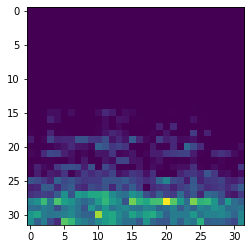

(32, 32)


In [8]:
plt.imshow(X[100])
plt.show()

print(X[100].shape)

**Train-Test-Validation Datasets**

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50)

print(f"X_train: {len(X_train)}")
print(f"y_train: {len(y_train)}")

print(f"X_val: {len(X_val)}")
print(f"y_val: {len(y_val)}")

print(f"X_test: {len(X_test)}")
print(f"y_test: {len(y_test)}")

X_train: 6112
y_train: 6112
X_val: 1310
y_val: 1310
X_test: 1310
y_test: 1310


**Saving Train-Test-Validation Datasets**

In [10]:
pathnew= '/content/drive/MyDrive/Project'

np.save(os.path.join(pathnew,'X_train'), X_train)
np.save(os.path.join(pathnew,'y_train'), y_train)

np.save(os.path.join(pathnew,'X_val'), X_val)
np.save(os.path.join(pathnew,'y_val'), y_val)

np.save(os.path.join(pathnew,'X_test'), X_test)
np.save(os.path.join(pathnew,'y_test'), y_test)